In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()     

In [2]:
all_df = pd.read_csv("spotify-2023.csv", encoding="latin-1")
all_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Explore the Data and do some pre-processing

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
#look for NaN values
all_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
#drop NaN values
key_dropped = all_df.dropna(subset=['key'])
key_dropped.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
#Assume that the NaN values mean that the song is not in shazam charts
clean_df = key_dropped.copy()
clean_df['in_shazam_charts'] = pd.DataFrame(key_dropped['in_shazam_charts'].fillna(0))
clean_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Create Seperate Features for Artists

In [7]:
#seperate the artist names using str.split()
artist_df = clean_df["artist(s)_name"].str.split(',', expand=True)
artist_df

,0,1,2,3,4,5,6,7
0,Latto,Jung Kook,None,None,None,None,None,None
1,Myke Towers,None,None,None,None,None,None,None
2,Olivia Rodrigo,None,None,None,None,None,None,None
3,Taylor Swift,None,None,None,None,None,None,None
4,Bad Bunny,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
948,Selena Gomez,None,None,None,None,None,None,None
949,Taylor Swift,None,None,None,None,None,None,None
950,Feid,Paulo Londra,None,None,None,None,None,None
951,Feid,Sech,Jhayco,None,None,None,None,None


In [8]:
#Add new columns for first, second and third artists
clean_df["artist_1"] = artist_df[0]
clean_df["artist_2"] = artist_df[1]
clean_df["artist_3"] = artist_df[2]

#removing artist(s)_name column
clean_df = clean_df.drop("artist(s)_name", axis=1)

#move newly created columns to the front
clean_df.insert(1, 'artist_1', clean_df.pop('artist_1'))
clean_df.insert(2, 'artist_2', clean_df.pop('artist_2'))
clean_df.insert(3, 'artist_3', clean_df.pop('artist_3'))
clean_df

,track_name,artist_1,artist_2,artist_3,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,None,2,2023,7,14,553,147,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,None,None,1,2023,3,23,1474,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,None,None,1,2023,6,30,1397,113,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,None,None,1,2019,8,23,7858,100,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,None,None,1,2023,5,18,3133,50,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,None,None,1,2022,11,3,953,0,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,None,None,1,2022,10,21,1180,0,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),Feid,Paulo Londra,None,2,2022,11,3,573,0,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,Sech,Jhayco,3,2022,10,20,1320,0,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
clean_df.isnull().sum()

track_name                0
artist_1                  0
artist_2                527
artist_3                758
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts          0
bpm                       0
key                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64

Splitting the artist column results in more NaN values that have to be cleaned. Just replace the Nan with 'empty'

In [10]:
#replace all the NaN values in artist_1 and artist_2 with "empty"
cleaner_df = clean_df.copy()
cleaner_df['artist_2'] = pd.DataFrame(clean_df['artist_2'].fillna("empty"))

even_cleaner_df = cleaner_df.copy()
even_cleaner_df['artist_3'] = pd.DataFrame(cleaner_df['artist_3'].fillna("empty")) 
even_cleaner_df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Feature Selection

In [11]:
dropped_df = even_cleaner_df.drop(['released_year', 'released_month', 'released_day', 'track_name', 'in_spotify_playlists',
                   'in_apple_playlists', 'in_deezer_playlists'
                  ], axis = 1)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   artist_1            858 non-null    object
 1   artist_2            858 non-null    object
 2   artist_3            858 non-null    object
 3   artist_count        858 non-null    int64 
 4   in_spotify_charts   858 non-null    int64 
 5   streams             858 non-null    object
 6   in_apple_charts     858 non-null    int64 
 7   in_deezer_charts    858 non-null    int64 
 8   in_shazam_charts    858 non-null    object
 9   bpm                 858 non-null    int64 
 10  key                 858 non-null    object
 11  mode                858 non-null    object
 12  danceability_%      858 non-null    int64 
 13  valence_%           858 non-null    int64 
 14  energy_%            858 non-null    int64 
 15  acousticness_%      858 non-null    int64 
 16  instrumentalness_%  858 non-nul

### Fixing Data type for streams and in_shazam_charts

In [12]:
dropped_df['streams'] = pd.to_numeric(dropped_df['streams'], errors='coerce')

In [13]:
dropped_df.isna().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               1
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

One of the songs did not convert properly so we try doing it manually

In [14]:
all_df.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

We find out that the data is messed up so we shall delete this row

In [15]:
df = dropped_df.dropna(subset=['streams'])
df.isnull().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_1            857 non-null    object 
 1   artist_2            857 non-null    object 
 2   artist_3            857 non-null    object 
 3   artist_count        857 non-null    int64  
 4   in_spotify_charts   857 non-null    int64  
 5   streams             857 non-null    float64
 6   in_apple_charts     857 non-null    int64  
 7   in_deezer_charts    857 non-null    int64  
 8   in_shazam_charts    857 non-null    object 
 9   bpm                 857 non-null    int64  
 10  key                 857 non-null    object 
 11  mode                857 non-null    object 
 12  danceability_%      857 non-null    int64  
 13  valence_%           857 non-null    int64  
 14  energy_%            857 non-null    int64  
 15  acousticness_%      857 non-null    int64  
 16  instrumentaln

For in_shazam_charts, the numbers have commas which cause them to be recognised as strings. Remove the commas.

In [17]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.isnull().sum()

/tmp/ipykernel_5105/2242003826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
/tmp/ipykernel_5105/2242003826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


artist_1               0
artist_2               0
artist_3               0
artist_count           0
in_spotify_charts      0
streams                0
in_apple_charts        0
in_deezer_charts       0
in_shazam_charts      41
bpm                    0
key                    0
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
dtype: int64

Again, some of the in_shazam_charts data is empty. Again, we assume that these songs do not appear in the charts.

In [18]:
df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0)) 
df.isnull().sum()

/tmp/ipykernel_5105/1676298079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0))


artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [19]:
df = df.reset_index(drop=True)
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,A,Major,60,24,39,57,0,8,3
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,C#,Major,82,67,77,8,0,12,5


### Creating new feature for whether songs appear in apple, spotify and shazam top 100 charts

In [20]:
df['spotify_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_spotify_charts']))
df['deezer_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_deezer_charts']))
df['apple_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_apple_charts']))
df['shazam_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_shazam_charts']))
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,spotify_top_100,deezer_top_100,apple_top_100,shazam_top_100
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,...,89,83,31,0,8,4,0,1,0,0
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,...,61,74,7,0,10,4,1,1,0,0
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,...,32,53,17,0,31,6,0,1,0,0
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,...,58,72,11,0,11,15,1,1,0,0
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,...,23,80,14,63,11,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,...,24,39,57,0,8,3,0,1,1,0
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,...,7,24,83,1,12,6,0,0,0,0
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,...,81,67,4,0,8,6,0,0,0,0
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,...,67,77,8,0,12,5,0,0,1,0


In [21]:
#remove 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'
df = df.drop(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'], axis=1)

### One-Hot Encoding Categorical Variables

variables to encode are artist names, key and mode

In [22]:
#import one-hot encoder and initialise it
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [23]:
#extract the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['artist_1', 'artist_2', 'artist_3', 'key', 'mode']

In [24]:
#perform the one-hot encoding
ohe = encoder.fit_transform(df[['artist_1', 'artist_2', 'artist_3', 'key', 'mode']])
encoded_df = pd.DataFrame(ohe, columns = encoder.get_feature_names_out(['artist_1', 'artist_2', 'artist_3', 'key', 'mode']))

In [25]:
encoded_df

,artist_1_(G)I-DLE,artist_1_21 Savage,artist_1_24kgoldn,artist_1_50 Cent,artist_1_A$AP Rocky,artist_1_Abhijay Sharma,artist_1_Adele,artist_1_Aerosmith,artist_1_Agust D,artist_1_Aitana,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
#join the encoded variables dataframe with our main dataframe
combined_df = pd.concat([df, encoded_df], axis=1)

In [27]:
#check for NaN values
combined_df.isnull().values.any()

False

In [28]:
#drop artist, key and mode columns
combined_df = combined_df.drop(['artist_1', 'artist_2', 'artist_3', 'key', 'mode'], axis='columns')

### Pre-processing is done. Now Explore the Data Further

In [29]:
#create numerical dataframe
numerical_columns = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'speechiness_%', 'liveness_%',
                    'instrumentalness_%']
numerical_df = df[numerical_columns]

#create categorical dataframe
categoricals = df.select_dtypes(include=['object']).columns.tolist()
categorical_df = df[categoricals]
extras = pd.DataFrame(df[['artist_count','apple_top_100', 'deezer_top_100', 'shazam_top_100',
                        'spotify_top_100']])
categorical_df = pd.concat([categorical_df, extras], axis=1)

In [30]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   streams             857 non-null    float64
 1   bpm                 857 non-null    int64  
 2   danceability_%      857 non-null    int64  
 3   valence_%           857 non-null    int64  
 4   energy_%            857 non-null    int64  
 5   acousticness_%      857 non-null    int64  
 6   speechiness_%       857 non-null    int64  
 7   liveness_%          857 non-null    int64  
 8   instrumentalness_%  857 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 60.4 KB


In [31]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_1         857 non-null    object
 1   artist_2         857 non-null    object
 2   artist_3         857 non-null    object
 3   key              857 non-null    object
 4   mode             857 non-null    object
 5   artist_count     857 non-null    int64 
 6   apple_top_100    857 non-null    int64 
 7   deezer_top_100   857 non-null    int64 
 8   shazam_top_100   857 non-null    int64 
 9   spotify_top_100  857 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 67.1+ KB


<Axes: xlabel='mode', ylabel='count'>

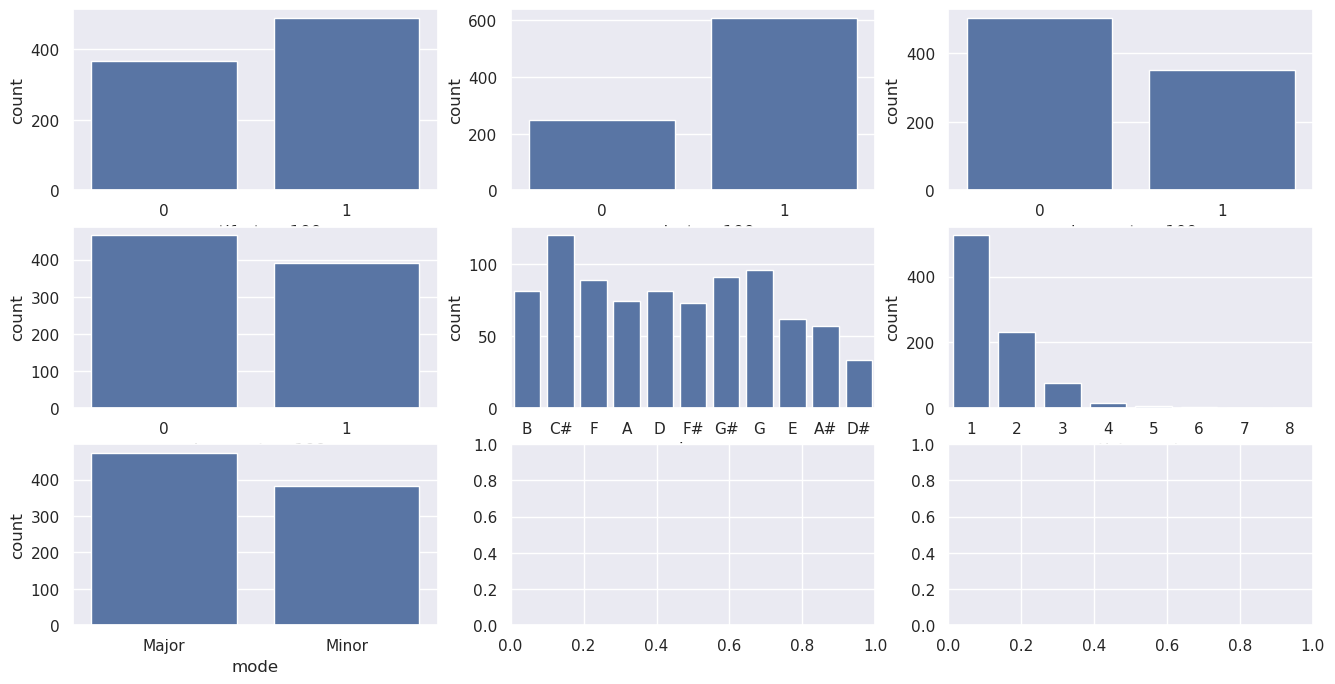

In [32]:
#plot categorical variables
fig, axes = plt.subplots(3, 3, figsize=(16,8))

sb.countplot(data=df, x='spotify_top_100', ax=axes[0,0])
sb.countplot(data=df, x='apple_top_100', ax=axes[0,1])
sb.countplot(data=df, x='deezer_top_100', ax=axes[0,2])
sb.countplot(data=df, x='shazam_top_100', ax=axes[1,0])
sb.countplot(data=df, x='key', ax=axes[1,1])
sb.countplot(data=df, x='artist_count', ax=axes[1,2])
sb.countplot(data=df, x='mode', ax=axes[2,0])


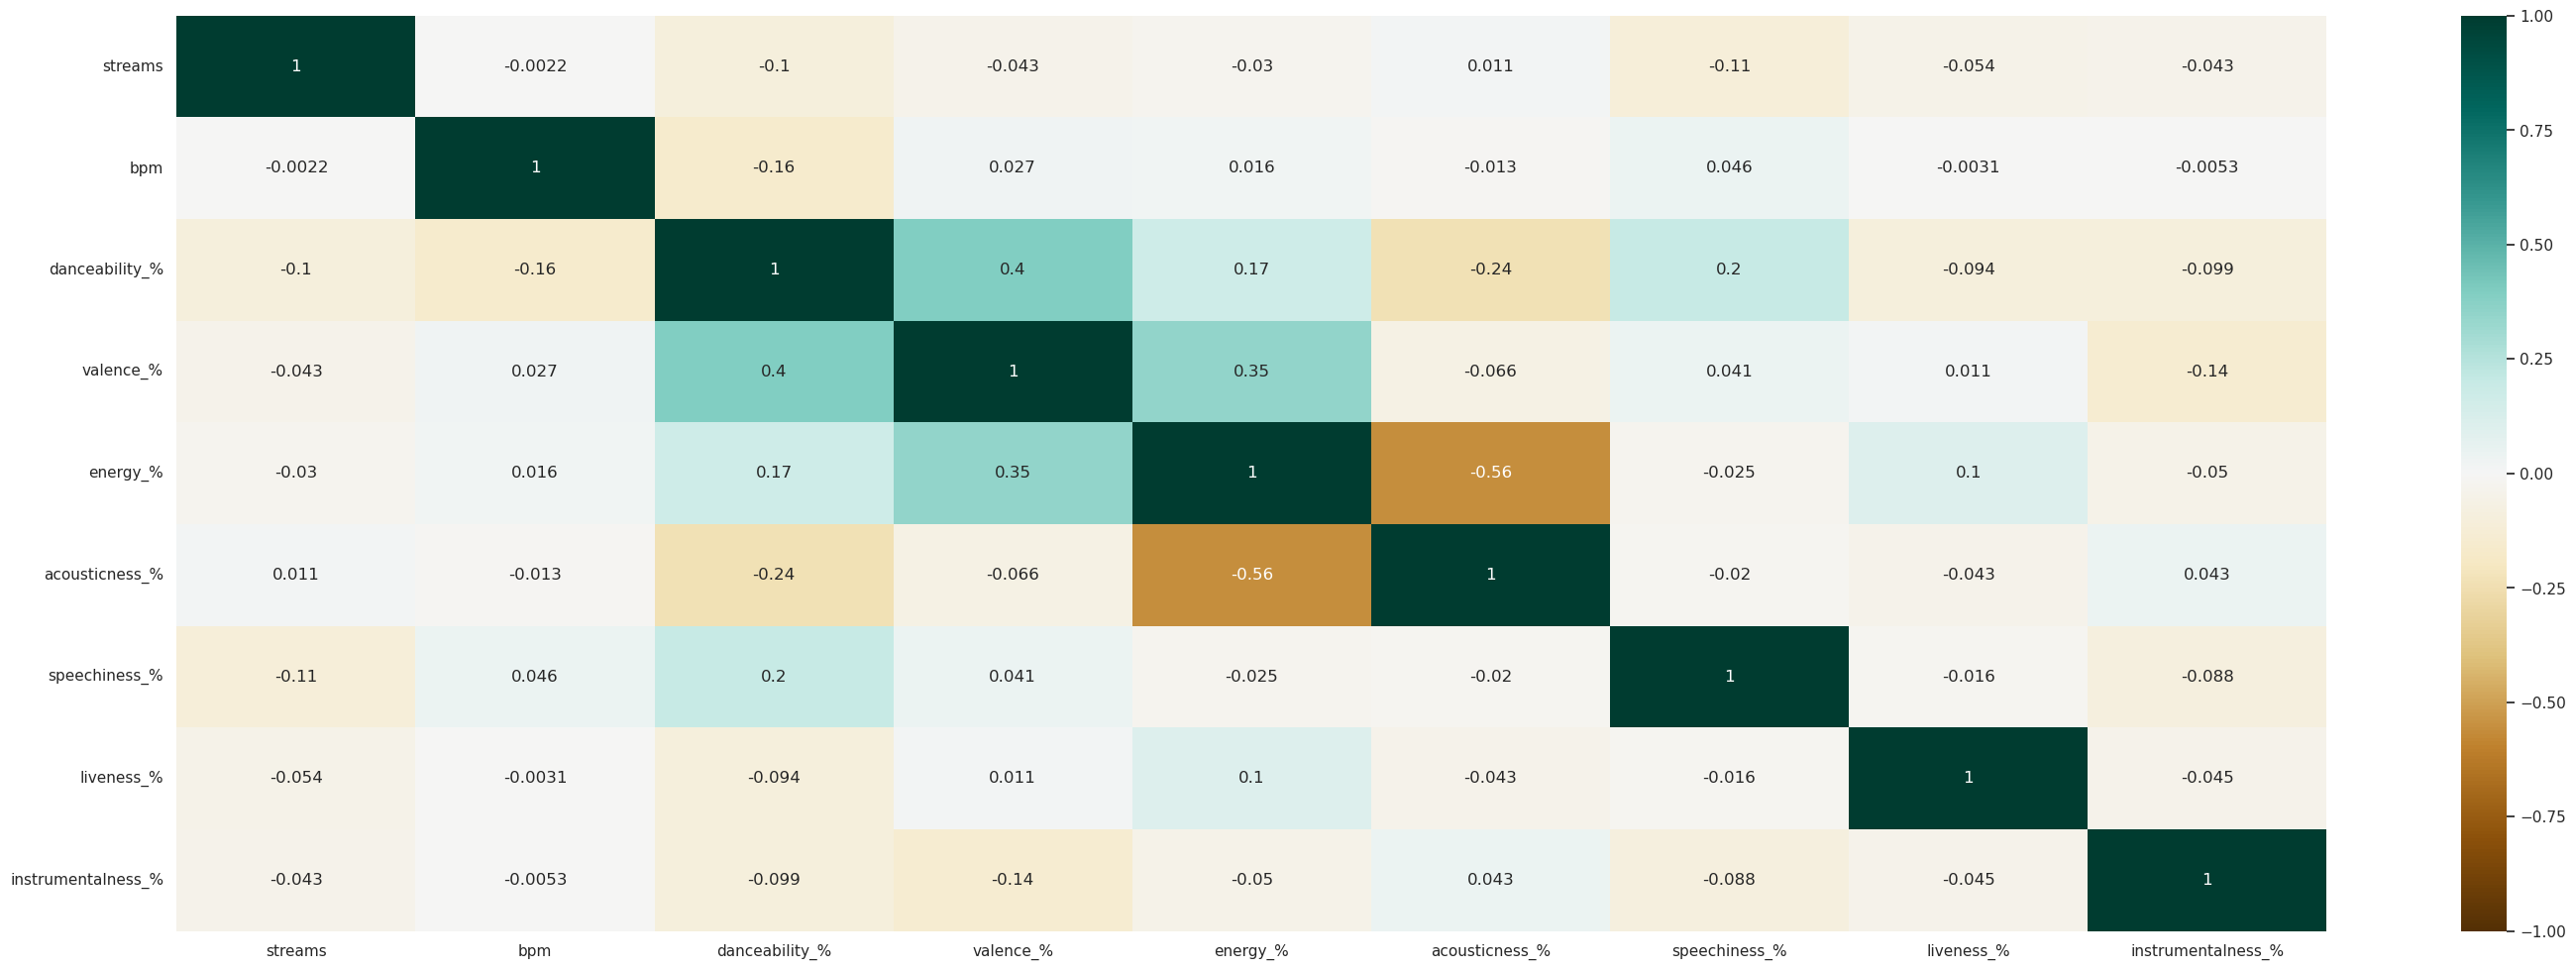

In [33]:
plt.figure(figsize=(35, 12))
heatmap = sb.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<Axes: xlabel='key', ylabel='Percent'>

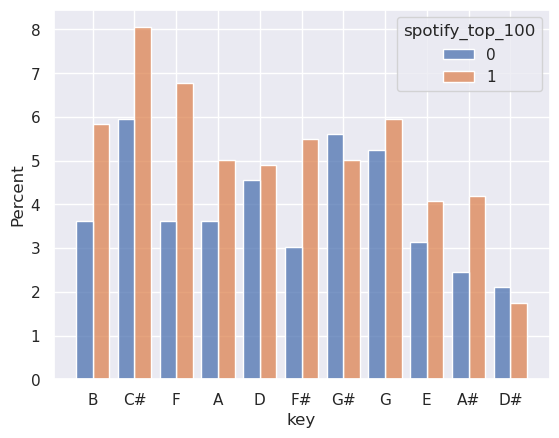

In [34]:
sb.histplot(data=categorical_df, x='key', hue='spotify_top_100', multiple='dodge', shrink=.8, stat='percent')

### Prepare Dataset for Modelling

We will remove the apple, deezer and shazam charts columns when training the model

Afterwards, we will predict the spotify charts for the test set and then use the same model to predict apple, shazam and deezer charts

In [36]:
spotify_df = combined_df.drop(['apple_top_100', 'shazam_top_100', 'deezer_top_100'], axis=1)

In [37]:
spotify_df = spotify_df.drop(['streams'], axis=1)

### Split the Dataset

In [38]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

x = spotify_df.drop(['spotify_top_100'], axis=1)
y = pd.DataFrame(spotify_df['spotify_top_100'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)

In [40]:
X_train.shape

(685, 767)

In [41]:
y_train.shape

(685, 1)

In [42]:
X_test.shape

(172, 767)

In [43]:
y_test.shape

(172, 1)

### Scale the data

In [45]:
#scaling the data using StandardScaler from sklearn 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns = list(X_train))
X_test_std = pd.DataFrame(scaler.fit_transform(X_test), columns = list(X_test))

In [48]:
#Standardization
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X_train_std=pd.DataFrame(sc.fit_transform(X_train))
#X_test_std=pd.DataFrame(sc.transform(X_test))

In [49]:
X_train_std

,artist_count,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_1_(G)I-DLE,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.000000,0.107914,0.383562,0.193548,0.469880,0.010309,0.000000,0.134831,0.021277,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.142857,0.374101,0.506849,0.064516,0.518072,0.010309,0.000000,0.528090,0.021277,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.517986,0.178082,0.193548,0.012048,0.865979,0.000000,0.089888,0.042553,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.142857,0.748201,0.438356,0.064516,0.855422,0.072165,0.000000,0.056180,0.382979,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.237410,0.917808,0.763441,0.433735,0.113402,0.000000,0.067416,0.510638,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,0.000000,0.079137,0.178082,0.279570,0.481928,0.350515,0.000000,0.123596,0.063830,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
681,0.000000,0.338129,0.657534,0.924731,0.807229,0.319588,0.021978,0.112360,0.021277,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
682,0.000000,0.251799,0.342466,0.494624,0.710843,0.443299,0.000000,0.134831,0.042553,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
683,0.142857,0.359712,0.739726,0.698925,0.530120,0.402062,0.000000,0.258427,0.063830,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [50]:
X_test_std

,artist_count,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_1_(G)I-DLE,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.6,0.413534,0.900000,0.119565,0.447761,0.011111,0.00,0.053191,0.049180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.578947,0.557143,0.293478,0.686567,0.166667,0.00,0.063830,0.032787,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.4,0.127820,0.771429,0.478261,0.865672,0.144444,0.00,0.191489,0.327869,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.2,0.481203,0.542857,0.869565,0.835821,0.777778,0.40,0.063830,0.065574,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.172932,0.400000,0.554348,0.701493,0.100000,0.00,0.000000,0.032787,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.0,0.759398,0.214286,0.206522,0.328358,0.055556,0.00,0.095745,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
168,0.0,0.263158,0.157143,0.260870,0.029851,0.900000,0.00,0.159574,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
169,0.0,0.300752,0.442857,0.576087,0.910448,0.000000,0.05,0.074468,0.016393,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
170,0.0,0.804511,0.700000,0.456522,0.477612,0.166667,0.00,0.106383,0.081967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Modelling

In [51]:
import tensorflow as tf
from tensorflow.keras import layers

2024-04-24 16:22:00.918350: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 16:22:01.055951: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 16:22:01.655054: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 16:22:04.191259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [52]:
def build_model1(hp):

    hp_units1 = hp.Int('units1', min_value=32, max_value=767, step=32)
    model = tf.keras.Sequential([
        #input layer
        layers.Dense(768, activation='relu', input_shape=[X_train_std.shape[1]]),
        layers.Dropout(rate=0.3),
        layers.Dense(units=hp_units1, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    #output layer uses sigmoid activation function which can return probability

    #defining optimisation algortihm and loss function. Note that cross-entropy is chosen instead of MSE or RSS because I scaled the data to 0-1.
    #If I were to use RSS, the gradient to descent will be very slow!
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001])
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
        loss= 'binary_crossentropy',
        metrics= ['binary_accuracy']
    )
    return model

def build_model2(hp):

    hp_units1 = hp.Int('units1', min_value=32, max_value=767, step=32)
    hp_units2 = hp.Int('units2', min_value=32, max_value=767, step=32)
    model = tf.keras.Sequential([
        #input layer
        layers.Dense(768, activation='relu', input_shape=[X_train_std.shape[1]]),
        layers.Dropout(rate=0.3),
        layers.Dense(units=hp_units1, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.Dense(units=hp_units2, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    #output layer uses sigmoid activation function which can return probability

    #defining optimisation algortihm and loss function. Note that cross-entropy is chosen instead of MSE or RSS because I scaled the data to 0-1.
    #If I were to use RSS, the gradient to descent will be very slow!
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001])
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
        loss= 'binary_crossentropy',
        metrics= ['binary_accuracy']
    )
    return model

def build_model3(hp):

    hp_units1 = hp.Int('units1', min_value=32, max_value=767, step=32)
    hp_units2 = hp.Int('units2', min_value=32, max_value=767, step=32)
    hp_units3 = hp.Int('units3', min_value=32, max_value=767, step=32)
    model = tf.keras.Sequential([
        #input layer
        layers.Dense(768, activation='relu', input_shape=[X_train_std.shape[1]]),
        layers.Dropout(rate=0.3),
        layers.Dense(units=hp_units1, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.Dense(units=hp_units2, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.Dense(units=hp_units3, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    #output layer uses sigmoid activation function which can return probability

    #defining optimisation algortihm and loss function. Note that cross-entropy is chosen instead of MSE or RSS because I scaled the data to 0-1.
    #If I were to use RSS, the gradient to descent will be very slow!
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001])
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
        loss= 'binary_crossentropy',
        metrics= ['binary_accuracy']
    )
    return model
    

### Keras Tuner on one hidden layer model

In [53]:
from keras_tuner.tuners import RandomSearch

In [54]:
tuner = RandomSearch(
    build_model1,
    objective = "val_binary_accuracy", #metric to optimise
    max_trials = 5,                    #number of hyperparameter combinations to try
    executions_per_trial = 2,          #number of times model is trained for each combination of hyperparameters
    directory = "optimal_model",
    project_name = "optimal_model"
)

Reloading Tuner from optimal_model/optimal_model/tuner0.json


In [55]:
tuner.search(X_train_std, y_train, epochs=50, validation_data=(X_test_std, y_test))

In [56]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'units1': 128, 'learning_rate': 0.0001}

In [57]:
model1 = tuner.hypermodel.build(best_hps)
history = model1.fit(X_train, y_train, epochs=150, validation_split=0.2, )

/home/tinkybala/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.4444 - loss: 2.1938 - val_binary_accuracy: 0.4526 - val_loss: 1.1262
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.4582 - loss: 2.0656 - val_binary_accuracy: 0.5255 - val_loss: 1.0039
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.4221 - loss: 2.1461 - val_binary_accuracy: 0.4964 - val_loss: 0.9227
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.5225 - loss: 1.7432 - val_binary_accuracy: 0.6131 - val_loss: 0.8590
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - binary_accuracy: 0.5162 - loss: 1.6989 - val_binary_accuracy: 0.5328 - val_loss: 0.8242
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.5202 - loss: 1.5422 - val_binary_accuracy: 0.4818 - val_loss: 0.8584
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.4500 - loss: 1.8937 - val_binary_accuracy: 0.5839 - val_loss: 0.8028
Epoch 

<Axes: >

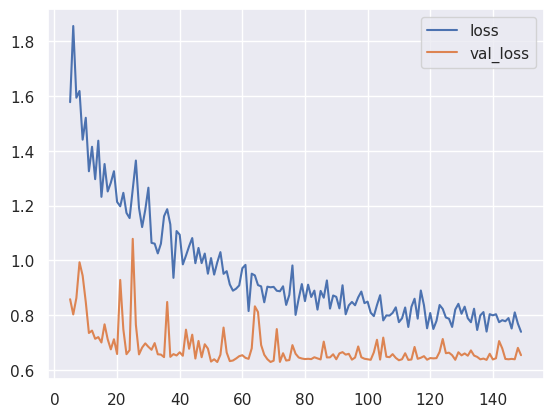

In [58]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


<Axes: >

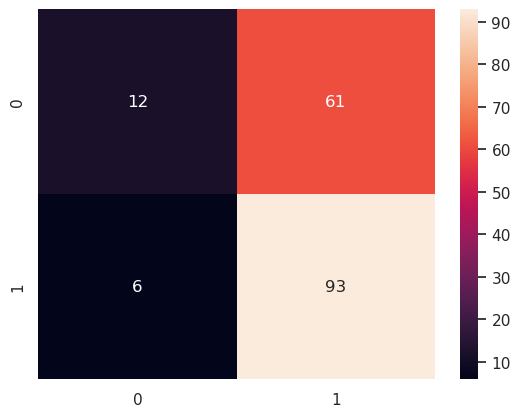

In [59]:
from sklearn.metrics import confusion_matrix

y_pred =  model1.predict(X_test)
confusion_matrix = confusion_matrix(y_test, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [60]:
#function to print metrics
def metrics(confusion_matrix):
    #Extract TP, FP, TN, FN
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    
    #recall and precision
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP)
    F1 = 2 * ((precision * recall) / (precision + recall))
    
    print("recall:", recall)
    print("precision:", precision)
    print("F1:", F1)
    print("accuracy:", accuracy)

In [61]:
metrics(confusion_matrix)

recall: 0.9393939393939394
precision: 0.6038961038961039
F1: 0.7351778656126483
accuracy: 0.6104651162790697


### Keras tuner for 2 layer model

In [62]:
tuner = RandomSearch(
    build_model2,
    objective = "val_binary_accuracy", #metric to optimise
    max_trials = 5,                    #number of hyperparameter combinations to try
    executions_per_trial = 2,          #number of times model is trained for each combination of hyperparameters
    directory = "optimal_model2",
    project_name = "optimal_model2"
)

Reloading Tuner from optimal_model2/optimal_model2/tuner0.json


In [63]:
tuner.search(X_train_std, y_train, epochs=50, validation_data=(X_test_std, y_test))

In [64]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'units1': 416, 'units2': 64, 'learning_rate': 0.0001}

In [65]:
model2 = tuner.hypermodel.build(best_hps)
history = model2.fit(X_train, y_train, epochs=200, validation_split=0.2, )

Epoch 1/200


/home/tinkybala/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - binary_accuracy: 0.4748 - loss: 2.2164 - val_binary_accuracy: 0.6131 - val_loss: 1.2091
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.5135 - loss: 1.7367 - val_binary_accuracy: 0.6131 - val_loss: 0.9071
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.5269 - loss: 1.7728 - val_binary_accuracy: 0.6131 - val_loss: 1.1740
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.4846 - loss: 1.6357 - val_binary_accuracy: 0.6204 - val_loss: 0.8686
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.5078 - loss: 1.7152 - val_binary_accuracy: 0.6131 - val_loss: 0.9818
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - binary_accuracy: 0.4914 - loss: 1.6421 - val_binary_accuracy: 0.6204 - val_loss: 0.7707
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.4802 - loss: 1.6595 - val_binary_accuracy: 0.6058 - val_loss: 0.7358
Epoch 8/200
18/18 

<Axes: >

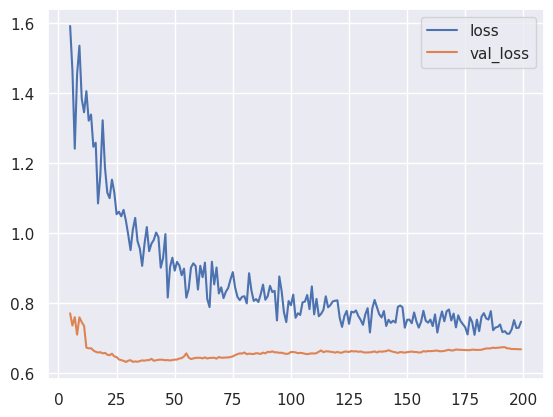

In [66]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<Axes: >

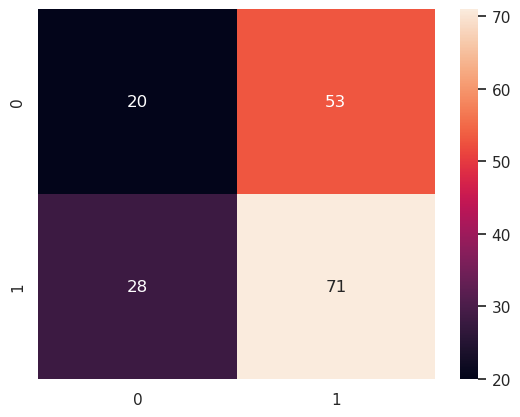

In [95]:
from sklearn.metrics import confusion_matrix

y_pred =  model2.predict(X_test)
confusion_matrix = confusion_matrix(y_test, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [68]:
metrics(confusion_matrix)

recall: 0.8181818181818182
precision: 0.5510204081632653
F1: 0.6585365853658536
accuracy: 0.5116279069767442


### Keras Tuner 3 layer model

In [69]:
tuner = RandomSearch(
    build_model3,
    objective = "val_binary_accuracy", #metric to optimise
    max_trials = 5,                    #number of hyperparameter combinations to try
    executions_per_trial = 2,          #number of times model is trained for each combination of hyperparameters
    directory = "optimal_model3",
    project_name = "optimal_model3"
)

Reloading Tuner from optimal_model3/optimal_model3/tuner0.json


In [70]:
tuner.search(X_train_std, y_train, epochs=50, validation_data=(X_test_std, y_test))

In [71]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'units1': 576, 'units2': 384, 'units3': 192, 'learning_rate': 0.001}

In [72]:
model3 = tuner.hypermodel.build(best_hps)
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, )

Epoch 1/100


/home/tinkybala/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - binary_accuracy: 0.5650 - loss: 0.7311 - val_binary_accuracy: 0.5693 - val_loss: 0.6674
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5421 - loss: 0.7384 - val_binary_accuracy: 0.5693 - val_loss: 0.6686
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.5597 - loss: 0.7151 - val_binary_accuracy: 0.5693 - val_loss: 0.6680
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.5392 - loss: 0.7066 - val_binary_accuracy: 0.5620 - val_loss: 0.6668
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.5465 - loss: 0.7159 - val_binary_accuracy: 0.5547 - val_loss: 0.6678
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5855 - loss: 0.6953 - val_binary_accuracy: 0.5547 - val_loss: 0.6685
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - binary_accuracy: 0.5424 - loss: 0.7262 - val_binary_accuracy: 0.5547 - val_loss: 0.6677
Epoch 8/100
18/18 

<Axes: >

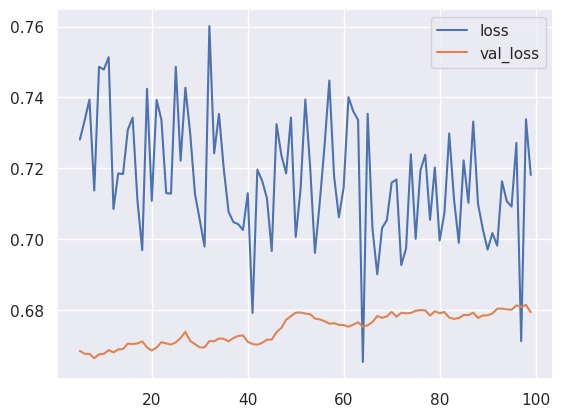

In [97]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<Axes: >

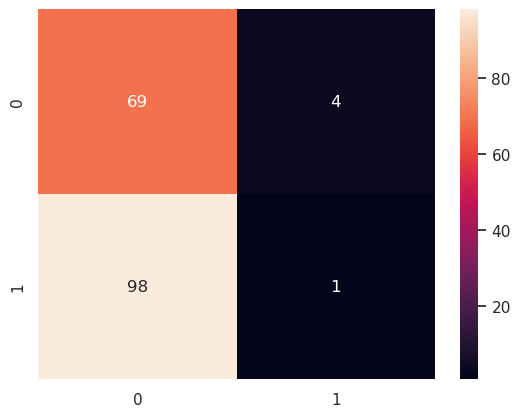

In [100]:
from sklearn.metrics import confusion_matrix

y_pred =  model3.predict(X_test)
confusion = confusion_matrix(y_test, np.rint(y_pred))
sb.heatmap(confusion, annot=True)

In [102]:
metrics(confusion)

recall: 0.010101010101010102
precision: 0.2
F1: 0.019230769230769232
accuracy: 0.4069767441860465


## Testing the model on other streaming services for robustness

### Apple Music

In [74]:
apple_df = combined_df.drop(['spotify_top_100', 'shazam_top_100', 'deezer_top_100'], axis=1)
y = pd.DataFrame(apple_df['apple_top_100'])
#renaming the apple column to spotify column so that the model can predict it
y = y.rename(columns={'apple_top_100' : 'spotify_top_100'})
X = apple_df.drop(['apple_top_100', 'streams'], axis=1)

#scale
scaler = MinMaxScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns = list(X))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Axes: >

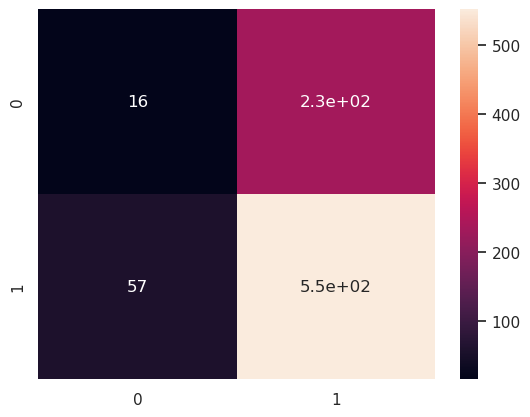

In [75]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(X)
confusion_matrix = confusion_matrix(y, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [76]:
metrics(confusion_matrix)

recall: 0.9064039408866995
precision: 0.7040816326530612
F1: 0.7925340990667624
accuracy: 0.662777129521587


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Axes: >

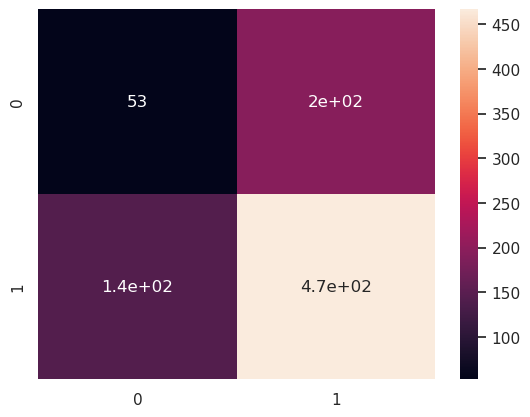

In [77]:
from sklearn.metrics import confusion_matrix
y_pred = model2.predict(X)
confusion_matrix = confusion_matrix(y, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [78]:
metrics(confusion_matrix)

recall: 0.7668308702791461
precision: 0.7054380664652568
F1: 0.7348544453186467
accuracy: 0.6067677946324388


### Shazam

In [79]:
apple_df = combined_df.drop(['spotify_top_100', 'apple_top_100', 'deezer_top_100'], axis=1)
y = pd.DataFrame(apple_df['shazam_top_100'])
#renaming the apple column to spotify column so that the model can predict it
y = y.rename(columns={'shazam_top_100' : 'spotify_top_100'})
X = apple_df.drop(['shazam_top_100', 'streams'], axis=1)

#scale
scaler = MinMaxScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns = list(X))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<Axes: >

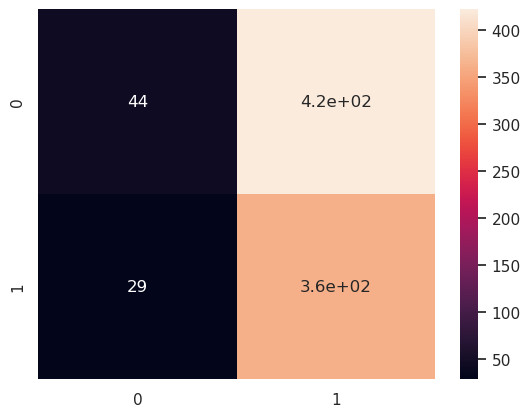

In [80]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(X)
confusion_matrix = confusion_matrix(y, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [81]:
metrics(confusion_matrix)

recall: 0.9258312020460358
precision: 0.461734693877551
F1: 0.6161702127659574
accuracy: 0.47374562427071176


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Axes: >

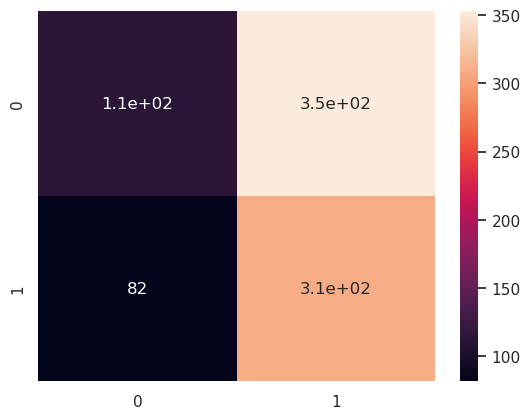

In [82]:
from sklearn.metrics import confusion_matrix
y_pred = model2.predict(X)
confusion_matrix = confusion_matrix(y, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [83]:
metrics(confusion_matrix)

recall: 0.7902813299232737
precision: 0.46676737160120846
F1: 0.5868945868945868
accuracy: 0.49241540256709454


### Deezer

In [84]:
apple_df = combined_df.drop(['spotify_top_100', 'apple_top_100', 'shazam_top_100'], axis=1)
y = pd.DataFrame(apple_df['deezer_top_100'])
#renaming the apple column to spotify column so that the model can predict it
y = y.rename(columns={'deezer_top_100' : 'spotify_top_100'})
X = apple_df.drop(['deezer_top_100', 'streams'], axis=1)

#scale
scaler = MinMaxScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns = list(X))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<Axes: >

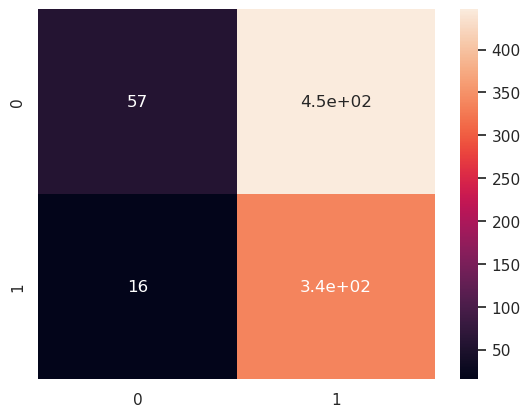

In [85]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(X)
confusion_matrix = confusion_matrix(y, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [86]:
metrics(confusion_matrix)

recall: 0.9546742209631728
precision: 0.4298469387755102
F1: 0.5927880386983289
accuracy: 0.4597432905484247


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<Axes: >

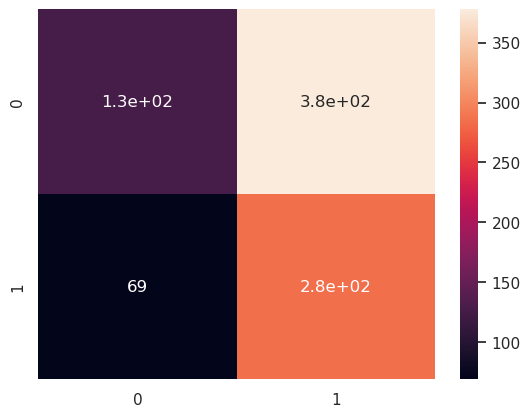

In [87]:
from sklearn.metrics import confusion_matrix
y_pred = model2.predict(X)
confusion_matrix = confusion_matrix(y, np.rint(y_pred))
sb.heatmap(confusion_matrix, annot=True)

In [88]:
metrics(confusion_matrix)

recall: 0.8045325779036827
precision: 0.42900302114803623
F1: 0.5596059113300492
accuracy: 0.47841306884480744
